In [1]:
import pandas as pd
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
import re                                #正则表达式，可用于匹配中文文本
import collections
import matplotlib.pyplot as plt


df = pd.read_csv("一级评论1.csv", encoding='utf-8') 


print(df.head())
print(len(df))



                                       content
0         “不是我们技术能力强”而是“我们敢违背伦理底线”才第一个研究出这种婴儿的
1                           拿人做活体实验的事，有嘛可宣扬的呢？
2  这项工程在美国是禁止的，事关伦理和人性，在没有法律规定下应该谨慎，而不是大张旗鼓宣传。
3           未报备就做这种实验，可以考虑将这个医院和负责人终身禁止进入医学领域了
4                                       潘多拉的魔盒
1233


In [2]:
df = df.dropna() #去除空值所在的整条(行)数据
print(len(df))

1233


In [3]:
# 创建停用词list
def stopwordslist(filepath):
    stopwords = [line.strip()for line in open(filepath,'r',encoding='utf-8').readlines()]
    return stopwords


In [4]:
# 对句子去除停用词
def movestopwords(sentence):
    stopwords = stopwordslist('scu_stopwords.txt')
    outstr = ''
    for word in sentence:
        if word not in stopwords:
            if word != '\t'and'\n':
                outstr += word 
                #outstr += ""
    return outstr


In [5]:
# 分词函数
def chinese_word_cut(mytext):
    import jieba.posseg as psg
    checkarr = ['n']
    returnmsg = ''.join([(x.word) for x in psg.cut(mytext) if (x.flag in checkarr)])
    return returnmsg



In [6]:
 # 分词结果  
df = df.content.apply(chinese_word_cut)
ff = df.apply(movestopwords)
ff = ff.dropna()

print(ff) #预览

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.728 seconds.
Prefix dict has been built succesfully.


0           技术能力底线婴儿
1               人活体事
2         工程事关人性法律规定
3          医院负责人医学领域
4                 魔盒
            ...     
1228                
1229    后果魔盒社有钱人世界人生
1230                
1231            狗屁制度
1232                
Name: content, Length: 1233, dtype: object


In [7]:
word_counts = collections.Counter(ff) # 对分词做词频统计

word_counts_top10 = word_counts.most_common(11) # 获取前11最高频的词

word_counts_top10 = word_counts_top10[1:10]
print (word_counts_top10) 

[('人', 18), ('人类', 13), ('科学', 9), ('底线', 9), ('魔盒', 8), ('孩子', 7), ('评论', 6), ('事', 6), ('科学家', 6)]


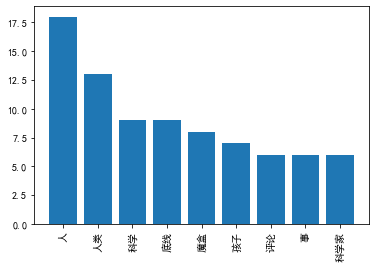

In [8]:
from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei']

wa=dict(word_counts_top10)
plt.bar(wa.keys(),wa.values())
plt.xticks(rotation=90)
plt.show()

In [9]:
#从文件导入停用词表
stpwrdpath = "scu_stopwords.txt"
stpwrd_dic = open(stpwrdpath, 'rb')
stpwrd_content = stpwrd_dic.read().decode('utf-8')#将停用词表转换为list
stpwrdlst = stpwrd_content.splitlines()
stpwrd_dic.close()



In [10]:
# 调用sklearn机器学习包进行向量化
n_features = 1000 # 指定特征关键词提取最大值
tf_vectorizer = CountVectorizer(strip_accents='unicode',# 去除raw document中的重音符号
    max_features=n_features,#stop_words='english', # 停用词
    stop_words=stpwrdlst,
    max_df=0.5, # 阈值如果某个词的document frequence大于max_df，不当作关键词.float，词出现的次数与语料库文档数的百分比，int出现次数
    min_df=3) # 如果某个词的document frequence小于min_df，则这个词不会被当作关键词


tf = tf_vectorizer.fit_transform(df)
print(tf)
print('\nvocabulary list:\n\n',tf_vectorizer.get_feature_names())
print( '\nvocabulary dic :\n\n',tf_vectorizer.vocabulary_)

  (4, 18)	1
  (28, 14)	1
  (101, 18)	1
  (123, 14)	1
  (135, 6)	1
  (146, 6)	1
  (180, 14)	1
  (187, 0)	1
  (194, 10)	1
  (195, 1)	1
  (210, 9)	1
  (218, 17)	1
  (223, 3)	1
  (243, 7)	1
  (244, 6)	1
  (260, 17)	1
  (270, 1)	1
  (279, 18)	1
  (291, 3)	1
  (304, 17)	1
  (311, 3)	1
  (312, 5)	1
  (315, 14)	1
  (327, 2)	1
  (341, 18)	1
  :	:
  (969, 14)	1
  (973, 18)	1
  (974, 6)	1
  (982, 3)	1
  (1001, 7)	1
  (1009, 7)	1
  (1054, 10)	1
  (1059, 0)	1
  (1071, 8)	1
  (1076, 18)	1
  (1079, 14)	1
  (1108, 17)	1
  (1113, 15)	1
  (1114, 12)	1
  (1128, 11)	1
  (1132, 3)	1
  (1138, 7)	1
  (1143, 4)	1
  (1158, 13)	1
  (1164, 2)	1
  (1165, 11)	1
  (1166, 16)	1
  (1181, 0)	1
  (1202, 16)	1
  (1217, 7)	1

vocabulary list:

 ['事情', '人伦', '人性', '人类', '基因', '好事坏事', '孩子', '底线', '感觉', '技术', '有点', '毒液', '活体', '真假', '科学', '科学家', '科技', '评论', '魔盒']

vocabulary dic :

 {'魔盒': 18, '科学': 14, '孩子': 6, '事情': 0, '有点': 10, '人伦': 1, '技术': 9, '评论': 17, '人类': 3, '底线': 7, '好事坏事': 5, '人性': 2, '活体': 12, '科学家': 15, '基因': 4

In [11]:
# LDA操作
n_topics = 5 # 人为指定划分的主题数
lda = LatentDirichletAllocation(n_topics,learning_method='online',max_iter=50,random_state=0 )
lda.fit(tf)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=50,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [12]:
# 显示主题关键词函数
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print('\nTopic Nr.%d:' % int(topic_idx + 1))
        print(''.join([feature_names[i] + ' ' + str(round(topic[i], 2)) + ' | ' for i in topic.argsort()[:-n_top_words - 1:-1]]))
n_top_words = 10 # 主题输出前20个关键词
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)





Topic Nr.1:
科学 8.8 | 科技 6.33 | 评论 5.89 | 事情 4.69 | 感觉 4.08 | 真假 0.2 | 好事坏事 0.2 | 底线 0.2 | 基因 0.2 | 人性 0.2 | 

Topic Nr.2:
孩子 6.91 | 技术 4.97 | 人伦 3.0 | 感觉 0.2 | 科技 0.2 | 事情 0.2 | 评论 0.2 | 科学 0.2 | 真假 0.2 | 好事坏事 0.2 | 

Topic Nr.3:
科学家 5.99 | 有点 5.01 | 毒液 4.73 | 人性 3.69 | 基因 3.12 | 感觉 0.2 | 事情 0.2 | 科技 0.2 | 评论 0.2 | 科学 0.2 | 

Topic Nr.4:
人类 12.64 | 活体 4.09 | 感觉 0.2 | 科技 0.2 | 事情 0.2 | 评论 0.2 | 科学 0.2 | 真假 0.2 | 好事坏事 0.2 | 基因 0.2 | 

Topic Nr.5:
底线 9.64 | 魔盒 7.85 | 真假 3.74 | 好事坏事 3.11 | 感觉 0.2 | 科技 0.2 | 事情 0.2 | 评论 0.2 | 科学 0.2 | 基因 0.2 | 


In [ ]:
import pyLDAvis
import pyLDAvis.gensim

data = pyLDAvis.sklearn.prepare(lda,tf,tf_vectorizer)

#让可视化可以在notebook内显示
pyLDAvis.show(data)



Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [30/Jun/2020 22:08:44] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Jun/2020 22:08:44] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [30/Jun/2020 22:08:44] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [30/Jun/2020 22:08:44] "GET /LDAvis.js HTTP/1.1" 200 -
